In [3]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
# %matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.models import load_model

In [4]:
# Get the path of files
img_dir='drive/MyDrive/Colab Notebooks/brain-tumor-detection/'
no_images=os.listdir(img_dir + 'no/')
yes_images=os.listdir(img_dir + 'yes/')

In [5]:
# Initialize dataset and label arrays
dataset=[]
label=[]

In [6]:
IMG_SIZE = 128

In [7]:
# Loop over each image in each category

# For images labelled with no
for image_name in no_images:
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(img_dir + 'no/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((IMG_SIZE, IMG_SIZE))
    dataset.append(np.array(image))
    label.append(0)

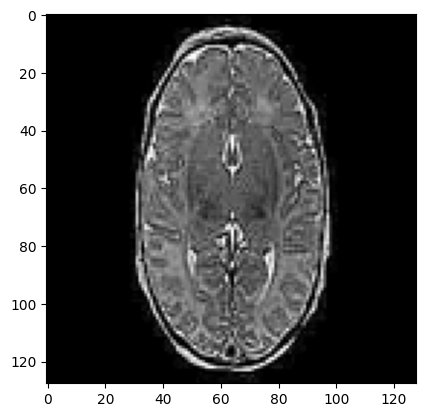

In [8]:
plt.imshow(dataset[50])

In [9]:
# For images labelled with yes
for image_name in yes_images:
  if(image_name.split('.')[1]=='jpg'):
    image=cv2.imread(img_dir + 'yes/' +image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((IMG_SIZE, IMG_SIZE))
    dataset.append(np.array(image))
    label.append(1)

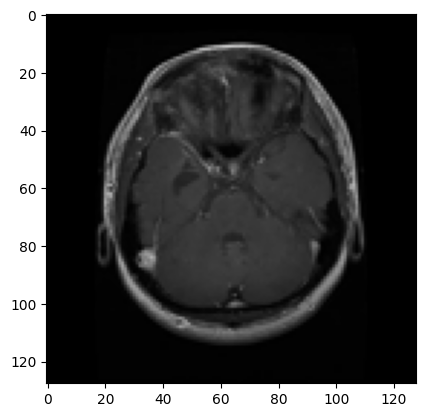

In [10]:
plt.imshow(dataset[5000])

In [11]:
# Convert dataset and label to numpy arrays   
dataset=np.array(dataset)
label=np.array(label)

In [12]:
print(dataset.shape, label.shape)

(7776, 128, 128, 3) (7776,)


In [13]:
print(dataset)

[[[[ 58  58  58]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 20  20  20]
   [ 20  20  20]
   [ 19  19  19]]

  [[ 40  40  40]
   [  0   0   0]
   [  2   2   2]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]

  [[ 43  43  43]
   [  1   1   1]
   [  2   2   2]
   ...
   [  1   1   1]
   [  2   2   2]
   [  2   2   2]]

  ...

  [[ 43  43  43]
   [  0   0   0]
   [  1   1   1]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]

  [[ 43  43  43]
   [  0   0   0]
   [  1   1   1]
   ...
   [  0   0   0]
   [  0   0   0]
   [  1   1   1]]

  [[ 45  45  45]
   [  0   0   0]
   [  2   2   2]
   ...
   [  2   2   2]
   [  1   1   1]
   [  3   3   3]]]


 [[[ 12  12  12]
   [ 13  13  13]
   [ 17  17  17]
   ...
   [ 13  13  13]
   [ 14  14  14]
   [  6   6   6]]

  [[ 13  13  13]
   [ 14  14  14]
   [ 14  14  14]
   ...
   [ 12  12  12]
   [ 13  13  13]
   [  5   5   5]]

  [[ 14  14  14]
   [ 15  15  15]
   [ 16  16  16]
   ...
   [ 11  11  11]
   [ 11  11  11]
   [  6   6

In [14]:
print(label)

[0 0 0 ... 1 1 1]


In [15]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=36)

In [16]:
print(x_train.shape)
print(y_train.shape)

(6220, 128, 128, 3)
(6220,)


In [17]:
print(x_test.shape)
print(y_test.shape)

(1556, 128, 128, 3)
(1556,)


In [18]:
x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)

In [19]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

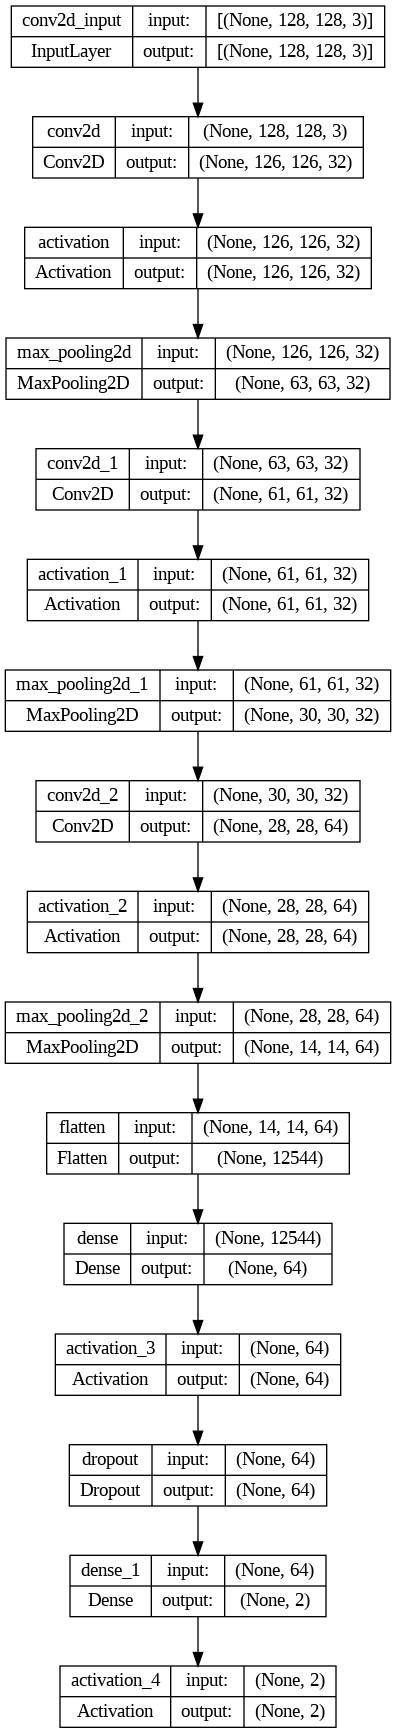

In [21]:
tf.keras.utils.plot_model(model,to_file="model.png", show_shapes=True, expand_nested=True)

In [22]:
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
389/389 [==============================] - 104s 263ms/step - loss: 0.4011 - accuracy: 0.8090 - val_loss: 0.2496 - val_accuracy: 0.8875
Epoch 2/10
389/389 [==============================] - 96s 246ms/step - loss: 0.2125 - accuracy: 0.9111 - val_loss: 0.1521 - val_accuracy: 0.9319
Epoch 3/10
389/389 [==============================] - 103s 265ms/step - loss: 0.1238 - accuracy: 0.9521 - val_loss: 0.0854 - val_accuracy: 0.9666
Epoch 4/10
389/389 [==============================] - 97s 250ms/step - loss: 0.0749 - accuracy: 0.9701 - val_loss: 0.0823 - val_accuracy: 0.9704
Epoch 5/10
389/389 [==============================] - 99s 256ms/step - loss: 0.0450 - accuracy: 0.9825 - val_loss: 0.0506 - val_accuracy: 0.9794
Epoch 6/10
389/389 [==============================] - 97s 250ms/step - loss: 0.0434 - accuracy: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9820
Epoch 7/10
389/389 [==============================] - 102s 263ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0586 - val

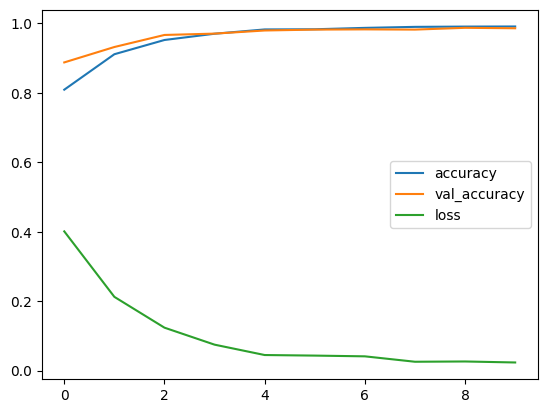

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend(loc="best")

In [25]:
# predict labels for the test data
y_pred = model.predict(x_test)

# convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# evaluate model accuracy on test data
accuracy = model.evaluate(x_test, y_test)[1]

print('Test accuracy:', accuracy)

49/49 [==============================] - 6s 116ms/step - loss: 0.0503 - accuracy: 0.9859
Test accuracy: 0.9858611822128296


In [26]:
model.save('drive/MyDrive/Colab Notebooks/brain-tumor-detection/BTD10Epochs.h5')

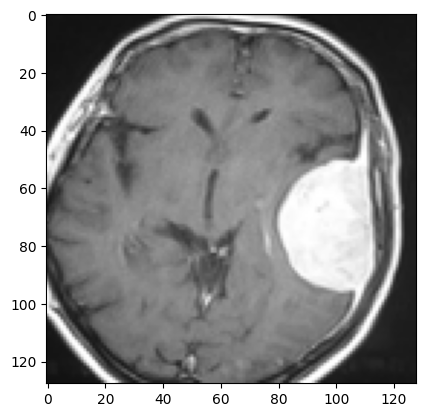

In [27]:
# load a sample image for prediction
img = cv2.imread("drive/MyDrive/Colab Notebooks/brain-tumor-detection/prediction/Tumor/Tr-me_0178.jpg")
img = Image.fromarray(img, 'RGB')
img = img.resize((IMG_SIZE, IMG_SIZE))
img = np.array(img)
plt.imshow(img)

input_img=np.expand_dims(img, axis=0)

In [28]:
# make a prediction on the image
prediction = model.predict(input_img)

# get the predicted class label
predicted_class = np.argmax(prediction)

1/1 [==============================] - 0s 85ms/step


In [29]:
print(predicted_class)

1


In [30]:
# print the predicted class label
if predicted_class == 0:
    print("The MRI Image predicted : NOT TO HAVE TUMOR.")
else:
    print("The MRI Image predicted : TO HAVE TUMOR.")

The MRI Image predicted : TO HAVE TUMOR.
